<a href="https://colab.research.google.com/github/Asylum0741/Product-Recommendation-System/blob/main/Product_Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
import importlib
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [ ]:
# user-defined function to check library is installed or not, if not installed then it will install automatically at runtime.
def check_and_install_library(library_name):
    try:
        importlib.import_module(library_name)
        print(f"{library_name} is already installed.")
    except ImportError:
        print(f"{library_name} is not installed. Installing...")
        try:
            import pip
            pip.main(['install', library_name])
        except:
            print("Error: Failed to install the library. Please install it manually.")

In [ ]:
if 'amazon-product-reviews' not in os.listdir():
  check_and_install_library('opendatasets')
  import opendatasets as od
  od.download('https://www.kaggle.com/datasets/irvifa/amazon-product-reviews')

In [ ]:
#load the dataframe and set column name
df=pd.read_csv('amazon-product-reviews/ratings_Electronics.csv',names=['userId', 'productId','rating','timestamp'])

In [ ]:
df.shape

(360839, 4)

In [ ]:
df.columns

Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')

In [ ]:
electronics_data=df.sample(n=300000,ignore_index=True)

In [ ]:
#after taking samples drop df to release the memory occupied by entire dataframe
del df

In [ ]:
#print top 5 records of the dataset
electronics_data.head()

,userId,productId,rating,timestamp
0,A1BTVPB879P33C,B000088NO8,5.0,1.067299e+09
1,AW7LSO4G9JO4M,B00008Y0VN,5.0,1.395274e+09
2,AGS3XL7CYRKIP,B0000AEGBL,1.0,1.203120e+09
3,A2EVEED8ZTPAQR,B000068MP5,5.0,1.040342e+09
4,AP5S08CRT12QA,B00006BMQS,4.0,1.074298e+09


In [ ]:
#print the concise information of the dataset
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     300000 non-null  object 
 1   productId  300000 non-null  object 
 2   rating     299999 non-null  float64
 3   timestamp  299999 non-null  float64
dtypes: float64(2), object(2)
memory usage: 9.2+ MB


In [ ]:
#drop timestamp column
electronics_data.drop('timestamp',axis=1,inplace=True)

In [ ]:
electronics_data.describe()

,rating
count,299999.000000
mean,3.988507
std,1.390880
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
#handle missing values
electronics_data.isnull().sum()

userId       0
productId    0
rating       1
dtype: int64

In [ ]:
#handling duplicate records
electronics_data[electronics_data.duplicated()].shape[0]

0

In [ ]:
electronics_data.head()

,userId,productId,rating
0,A1BTVPB879P33C,B000088NO8,5.0
1,AW7LSO4G9JO4M,B00008Y0VN,5.0
2,AGS3XL7CYRKIP,B0000AEGBL,1.0
3,A2EVEED8ZTPAQR,B000068MP5,5.0
4,AP5S08CRT12QA,B00006BMQS,4.0


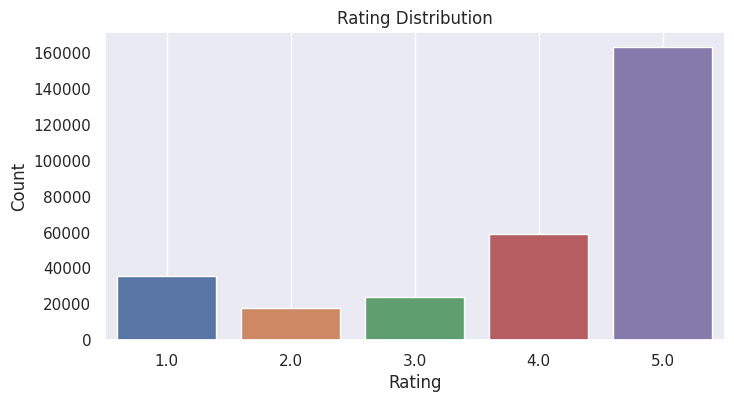

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='rating',data=electronics_data)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

most of the user have given 5 rating

In [ ]:
print('Total rating : ',electronics_data.shape[0])
print('Total unique users : ',electronics_data['userId'].unique().shape[0])
print('Total unique products : ',electronics_data['productId'].unique().shape[0])

Total rating :  300000
Total unique users :  253329
Total unique products :  21880


analyzing the rating by user

In [ ]:
no_of_rated_products_per_user = electronics_data.groupby(by='userId')['rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

userId
A231WM2Z2JL0U3    204
A5JLAU2ARJ0BO     191
A25HBO5V8S8SEA    122
AKT8TGIT6VVZ5      62
A6FIAB28IS79       59
Name: rating, dtype: int64

In [ ]:
print('No of rated product more than 50 per user : {} '.format(sum(no_of_rated_products_per_user >= 50)))

No of rated product more than 50 per user : 7 


In [ ]:
data=electronics_data.groupby('productId').filter(lambda x:x['rating'].count()>=50)

In [ ]:
data.head()

,userId,productId,rating
0,A1BTVPB879P33C,B000088NO8,5.0
1,AW7LSO4G9JO4M,B00008Y0VN,5.0
5,A1QVJJT352NT83,B0000AI0N1,5.0
7,A2NRDI65D55JWY,B00007IFED,5.0
8,A17WCM5NQXCER2,B00006L4FX,5.0


In [ ]:
no_of_rating_per_product=data.groupby('productId')['rating'].count().sort_values(ascending=False)

In [ ]:
no_of_rating_per_product.head()

productId
B00007E7JU    2917
B00007M1TZ    2174
B00004ZCJE    2085
B00001P4ZH    1736
B00009R6TA    1638
Name: rating, dtype: int64

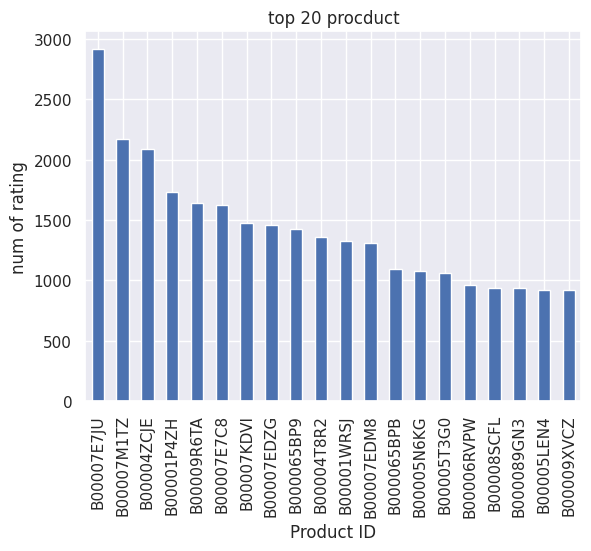

In [ ]:
#top 20 product
no_of_rating_per_product.head(20).plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('num of rating')
plt.title('top 20 procduct')
plt.show()

In [ ]:
#average rating product
mean_rating_product_count=pd.DataFrame(data.groupby('productId')['rating'].mean())

In [ ]:
mean_rating_product_count.head()

,rating
productId,
0972683275,4.480181
1400501466,3.584541
1400501520,4.217391
1400501776,3.823529
1400532620,3.620438


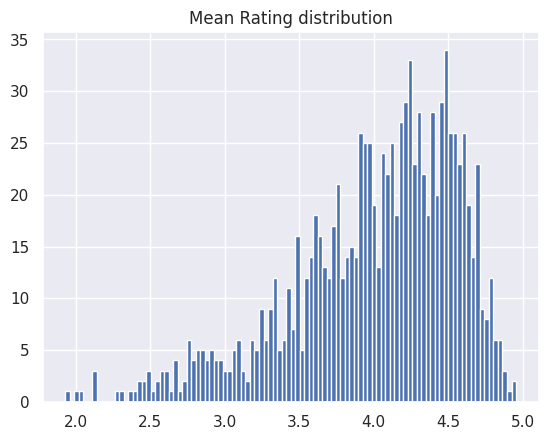

In [ ]:
#plot the rating distribution of average rating product
plt.hist(mean_rating_product_count['rating'],bins=100)
plt.title('Mean Rating distribution')
plt.show()

In [ ]:
#check the skewness of the mean rating data
mean_rating_product_count['rating'].skew()

-0.9325547916969933

In [ ]:
#it is highly negative skewed

In [ ]:
mean_rating_product_count['rating_counts'] = pd.DataFrame(data.groupby('productId')['rating'].count())

In [ ]:
mean_rating_product_count.head()

,rating,rating_counts
productId,,
0972683275,4.480181,883
1400501466,3.584541,207
1400501520,4.217391,69
1400501776,3.823529,119
1400532620,3.620438,137


In [ ]:
#highest mean rating product
mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].max()]

,rating,rating_counts
productId,,
B00007E7JU,4.562564,2917


In [ ]:
#min mean rating product
print('min average rating product : ',mean_rating_product_count['rating_counts'].min())
print('total min average rating products : ',mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].min()].shape[0])

min average rating product :  50
total min average rating products :  23


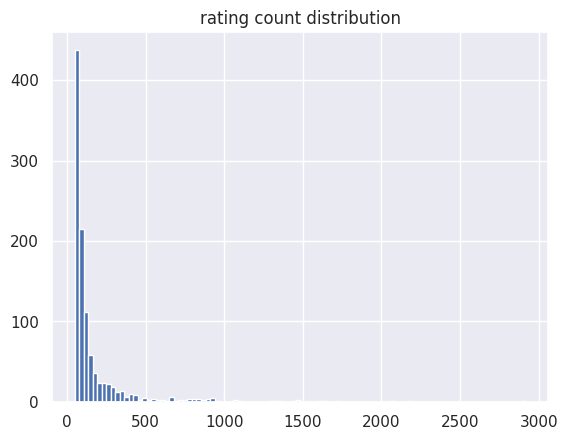

In [ ]:
#plot the rating count of mean_rating_product_count
plt.hist(mean_rating_product_count['rating_counts'],bins=100)
plt.title('rating count distribution')
plt.show()

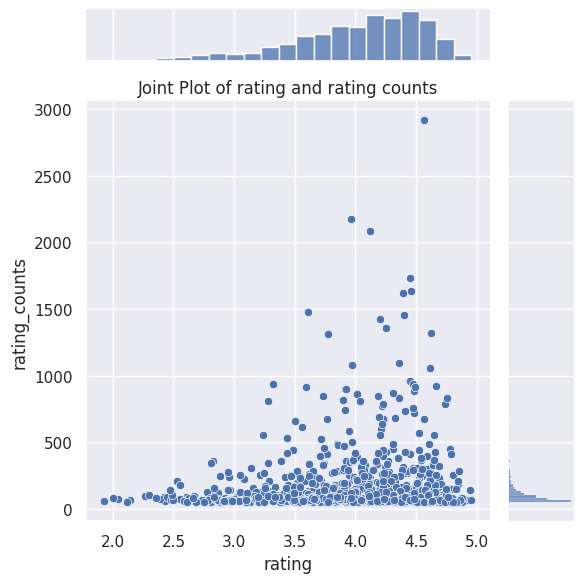

In [ ]:
#joint plot of rating and rating counts
sns.jointplot(x='rating',y='rating_counts',data=mean_rating_product_count)
plt.title('Joint Plot of rating and rating counts')
plt.tight_layout()
plt.show()

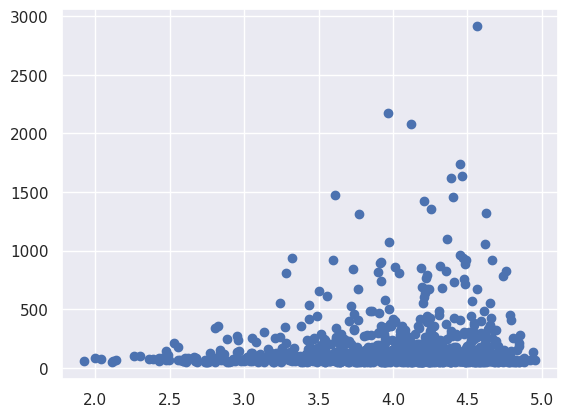

In [ ]:
plt.scatter(x=mean_rating_product_count['rating'],y=mean_rating_product_count['rating_counts'])
plt.show()

In [ ]:
print('Correlation between Rating and Rating Counts is : {} '.format(mean_rating_product_count['rating'].corr(mean_rating_product_count['rating_counts'])))

Correlation between Rating and Rating Counts is : 0.08500865061477621 


In [ ]:
#import surprise library for collebrative filtering
check_and_install_library('surprise')
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

surprise is not installed. Installing...


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting surprise

Downloading surprise-0.1-py2.py3-none-any.whl (1.8 kB)

Collecting scikit-surprise (from surprise)

Downloading scikit-surprise-1.1.3.tar.gz (771 kB)

Output()

Preparing metadata (setup.py): started

Preparing metadata (setup.py): finished with status 'done'

Requirement already satisfied: joblib>=1.0.0 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.3.2)

Requirement already satisfied: numpy>=1.17.3 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.23.5)

Requirement already satisfied: scipy>=1.3.2 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.11.3)

Building wheels for collected packages: scikit-surprise

Building wheel for scikit-surprise (setup.py): started

Building wheel for scikit-surprise (setup.py): finished with status 'done'

Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163481 sha256=6e1bfc18e9188f4ac826e105fef094ba55ae35307db62558e46ad1dc793d34c6

Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445

Successfully built scikit-surprise

Installing collected packages: scikit-surprise, surprise

Successfully installed scikit-surprise-1.1.3 surprise-0.1

In [ ]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(data,reader)

In [ ]:
#Splitting surprise the dataset into 80,20 ratio using train_test_split
trainset, testset = train_test_split(surprise_data, test_size=0.3,random_state=42)

In [ ]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
#make prediction using testset
test_pred=algo.test(testset)

In [ ]:
#print RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred ,verbose=True)

Item-based Model : Test Set
RMSE: 1.3312


1.3312417990556915

In [ ]:
data.shape


(174259, 3)

In [ ]:
data2=data.sample(170000)
ratings_matrix = data2.pivot_table(values='rating', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

productId,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,...,B0000Y2WYS,B0000YTZOS,B000117D9O,B000117DF8,B00011G5FW,B00011KHTM,B00011KLOI,B00011KM38,B00011Y1MQ,B00012EYNG
userId,,,,,,,,,,,,,,,,,,,,,
A00124802J36AVPT3779A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0015232111B3971DPSKF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00472882AAY7AC6O2NUL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00570163ATHRHPDG3GKN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00625243BI8W1SSZNLMD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


above we have created a pivot table of the rating where the value of the column will rating and index will be userId and the column name will be productId

In [ ]:
#check the shape of the rating_matrix
ratings_matrix.shape

(153931, 1060)

In [ ]:
#transpose the metrix to make column (productId) as index and index as column (userId)
x_ratings_matrix=ratings_matrix.T
x_ratings_matrix.head()

userId,A00124802J36AVPT3779A,A0015232111B3971DPSKF,A00472882AAY7AC6O2NUL,A00570163ATHRHPDG3GKN,A00625243BI8W1SSZNLMD,A0072193KFP6LUHKEXLT,A00988692Q9ZDJUD8BQSM,A00995931BE16NG4F52QC,A01035471LBTPFWCOKAU2,A01771021FA6LVUILJVPD,...,AZZOFVMQC0BJG,AZZOHSQB8494S,AZZP8BC9WE0N8,AZZQFCVCFE8HL,AZZUBI2MEAHI9,AZZUDVKC0E2XU,AZZUQYE2C1LNI,AZZX23UGJGKTT,AZZYWDOD33FFE,AZZZEWADNFNUM
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400532620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_ratings_matrix.shape

(1060, 153931)

In [ ]:
#Decomposition of the matrix using Singular Value Decomposition technique
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(x_ratings_matrix)
decomposed_matrix.shape

(1060, 10)

In [ ]:
#Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(1060, 1060)

In [ ]:
x_ratings_matrix.index[10]

'6301977173'

In [ ]:
i="B00001P4ZH"
product_names=list(x_ratings_matrix.index)
product_id=product_names.index(i)
print(product_id)

69


In [ ]:
correlation_product_ID = correlation_matrix[product_id]
correlation_product_ID.shape

(1060,)

In [ ]:
correlation_matrix[correlation_product_ID>0.75].shape

(52, 1060)

In [ ]:
#Recommending top highly correlated products in sequence
recommend = list(x_ratings_matrix.index[correlation_product_ID > 0.75])
recommend[:20]

['B000001OM4',
 'B00000J1TX',
 'B00000JSGF',
 'B00000K4KH',
 'B00001P4XA',
 'B00001P4XH',
 'B00001P4ZH',
 'B00001P4ZR',
 'B00001P505',
 'B00001W0DD',
 'B00002EQCS',
 'B00004SY4H',
 'B00004YBVE',
 'B00004Z0BO',
 'B00004Z7G9',
 'B000051SD1',
 'B000051ZOA',
 'B00005A1KZ',
 'B00005AW1H',
 'B00005BC0K']